In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_ii = data[(data['E-I']==2)]

In [4]:
data_ii

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
64,2016081801,27,1,2,1,1,1,"12,13,14","16,17,18,19",7,0,Disynaptic response,50HZ II preonly
65,2016092802,28,2,2,1,1,1,"10,12","14,15,16,17",7,0,NaN,50HZ II preonly
66,2016102101,26,2,2,0,0,2,"11,12","14,15,16,17,18,19,20",8,0,No change,50Hz II high freq
68,2016110103,30,1,2,0,1,2,"18,19,20","22,23,24,25,26,27",8,0,No change or weak LTD,50Hz II high freq
69,2016120401,28,2,2,0,0,2,"11,12,13","15,16,17,18",8,0,LTP,50Hz II high freq
70,2016120401,28,1,2,0,0,2,"11,12,13","15,16,17,18",8,0,LTP,50Hz II high freq


<Container object of 3 artists>

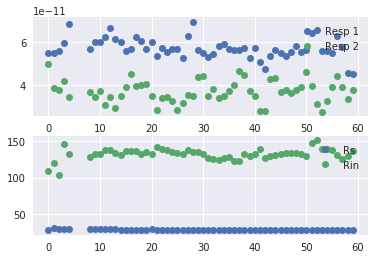

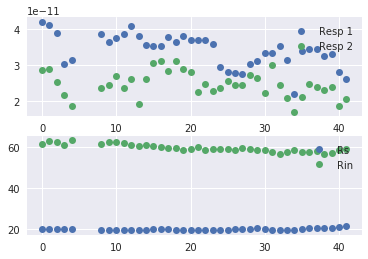

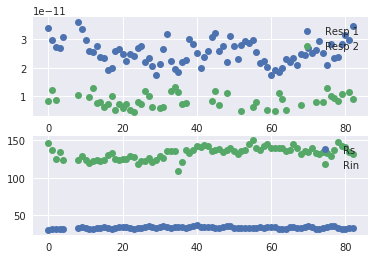

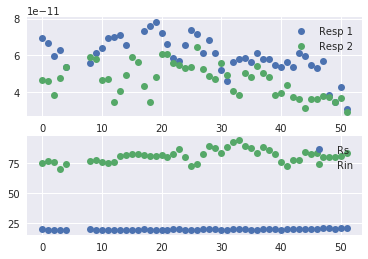

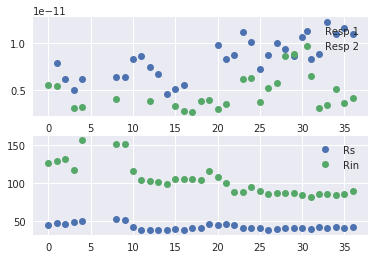

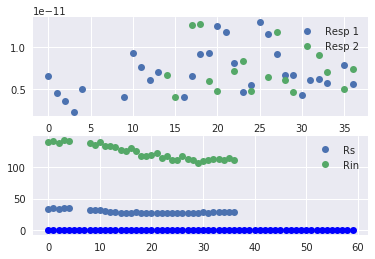

In [5]:
patch_pip.df_ana(data_ii,'/data/data_II_all')
ii = pd.read_pickle('/data/data_II_all')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(ii)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [7]:
elimi = np.array([50, 30, 50, 40, 30, 35])
elimi_sr = pd.Series(elimi, index=ii.index)
ii['elimi']=elimi_sr
ii.to_pickle('/data/ana_ii')

In [ ]:
patch_pip.df_ana(data_asso_50Hz_uni,'/data/data_asso_IE_50Hz_uni')
asso_50Hz_uni = pd.read_pickle('/data/data_asso_IE_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

/src/Patch_ana/Patch_ana/patch_pip.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  ir = 0.005 / np.mean(trial_demean[ir_region]) * 1e-6 - 20


In [ ]:
elimi = np.array([40,55,40,50,50,15,20])
elimi_sr = pd.Series(elimi, index=asso_50Hz_uni.index)
asso_50Hz_uni['elimi']=elimi_sr
asso_50Hz_uni.to_pickle('/data/ana_asso_IE_50Hz_uni')

In [ ]:
post_50Hz = pd.concat([asso_50Hz_uni, asso_50Hz_reci], axis=0)
post_50Hz.to_pickle('/data/ana_asso_IE_50Hz')